In [1]:
import numpy as np

# Be sure to restart the notebook kernel if you make changes to parseTandA
# Re-running this cell does not re-load the module otherwise
from helper import *

# We use matplotlib for plotting. You can basically get any plot layout/style
# etc you want with this module. I'm setting it up for basics here, meaning
# that I want it to parse LaTeX and use the LaTeX font family for all text.
# !! If you don't have a LaTeX distribution installed, this notebook may
#    throw errors when it tries to create the plots. If that happens, 
#    either install a LaTeX distribution or remove/comment the 
#    matplotlib.rcParams.update(...) line.
#    In both cases, restart the kernel of this notebook afterwards.
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline

from PIL import Image
from wordcloud import WordCloud, STOPWORDS

rcparams = {                      
    "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
    "text.usetex": True,                # use LaTeX to write all text
    "font.family": "lmodern",
    "font.serif": [],                   # blank entries should cause plots to inherit fonts from the document
    "font.sans-serif": [],
    "font.monospace": [],          
    "font.size": 12,
    "legend.fontsize": 12,         
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "pgf.preamble": [
        r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts becasue your computer can handle it :)
        r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
        ]
}
matplotlib.rcParams.update(rcparams)

In [2]:
re_parse = False
if re_parse:
    all_titles = load_and_parse_all_titles('alltitles.txt')
    # Save to a file, so we can load it much faster than having
    # to re-parse the raw data.
    np.save("alltitles.npy", all_titles)
else:
    # Load the titles from the file.
    # The atleast_2d is a hack for correctly loading the dictionary...
    all_titles = np.atleast_2d(np.load("alltitles.npy"))[0][0]

## Learn ngrams

In [3]:
all_years = sorted(list(all_titles.keys()))
titles = get_titles_for_years(all_titles, all_years)
ngram_titles, bigrams, ngrams = get_ngram_titles(titles)
sortedbis  = sorted( [(bigrams[b][1], bigrams[b][0], b) for b in bigrams.keys()] )[::-1]
sortedns = sorted( [(ngrams[b][1], ngrams[b][0], b) for b in ngrams.keys()] )[::-1]

## Make a WordCloud!

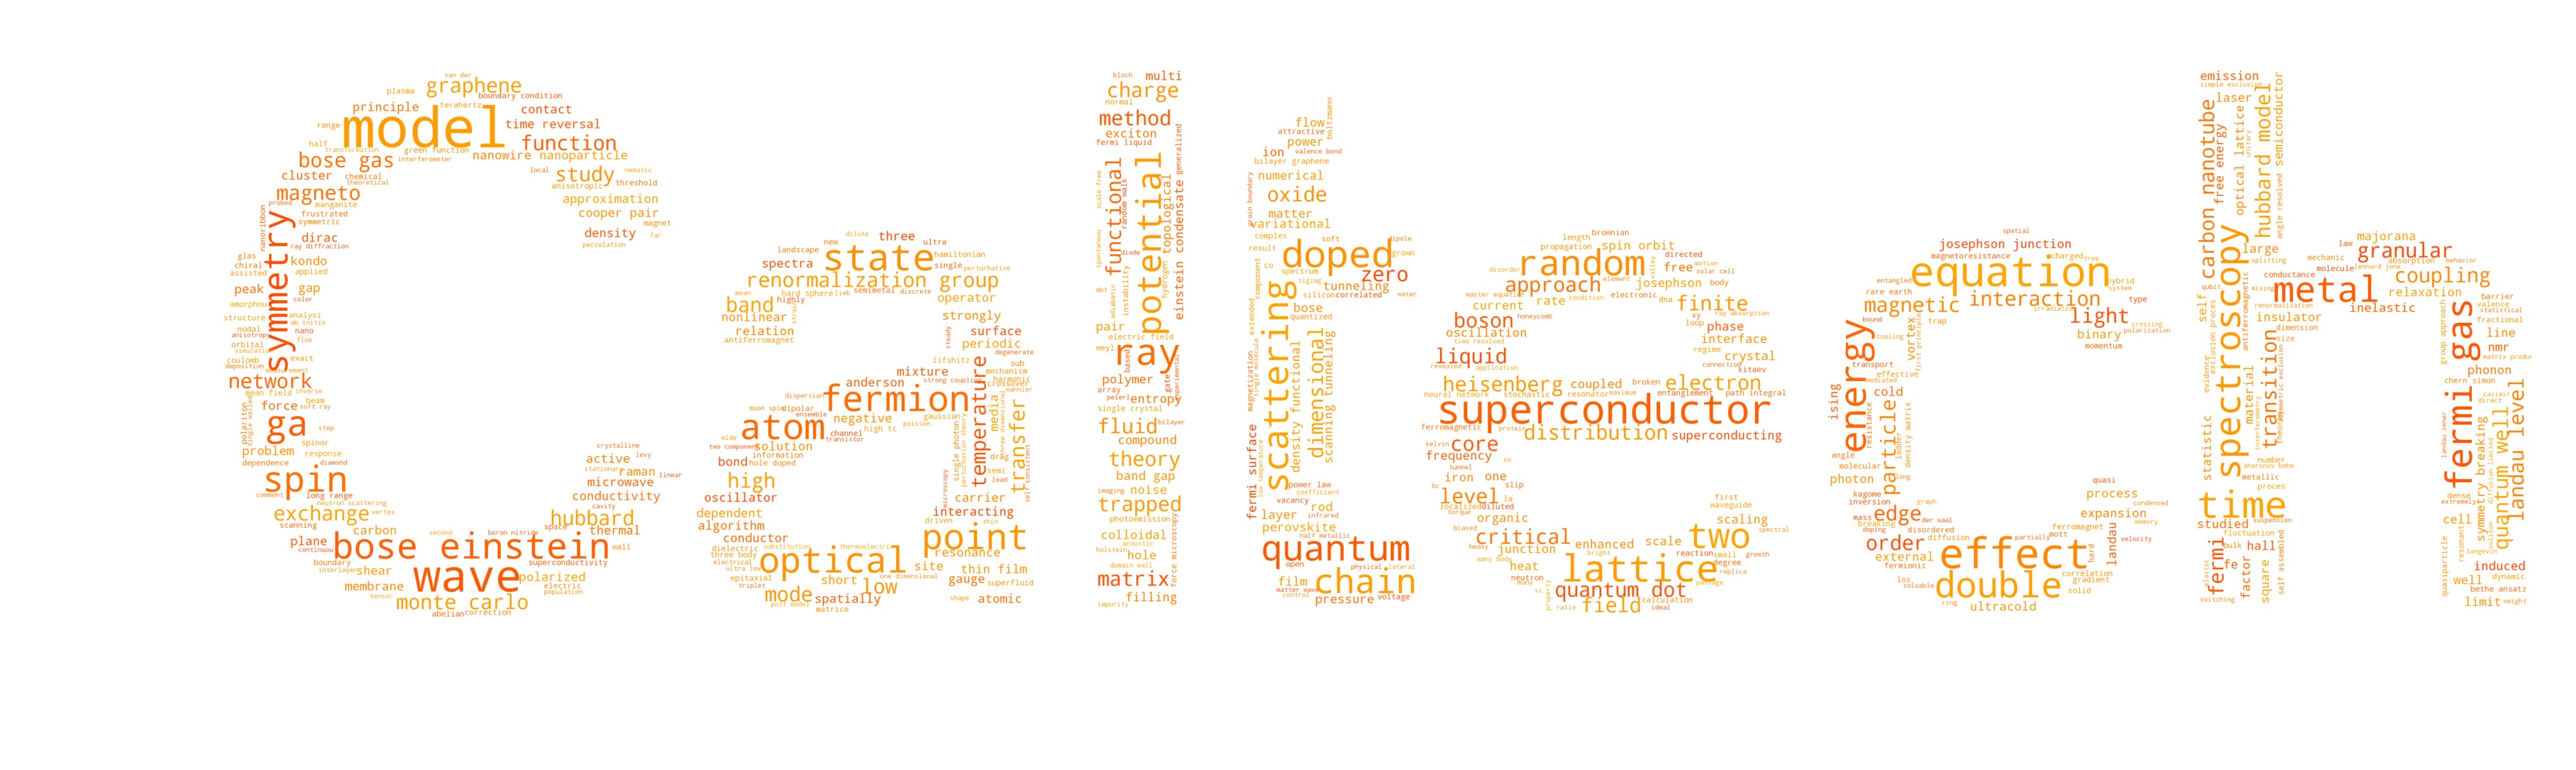

In [6]:
# Colors go from orangered to darkorange to orange
colors = [(255/255, 69/255, 0), (255/255, 140/255, 0), (255/255, 165/255, 0)]
cm = LinearSegmentedColormap.from_list("darkOranges", colors, N=100)

# Read the whole text.
text = ""
for i in range(len(sortedns)):
    s = str(sortedns[i][2])[2:-1]
    text = text + " " + re.sub("_", "-", s)

mask = np.array(Image.open("./caltechmask.png"))

stopwords = set(STOPWORDS)
stopwords.add("non")

# Set up ...
wc = WordCloud(background_color="white", random_state=1990, scale=4, max_words=2000, max_font_size=36, 
               mask=mask, stopwords=stopwords, colormap=cm)
# ... and generate word cloud
wc.generate(text)

# show
fig, ax = plt.subplots(dpi=600)
fig.set_size_inches(7,2)
ax.imshow(wc, interpolation='bilinear')
ax.axis("off")
fig.savefig("caltechwordcloud.png")#, bbox_inches='tight')